In [ ]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import string
import re
from bs4 import BeautifulSoup
!pip install contractions
import contractions
from collections import Counter

In [ ]:
#readin the data from file and generate dataframe
def parse(path):
  g = gzip.open('reviews_Amazon_Instant_Video_5.json.gz', 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Video_Games.json.gz')
print(df['reviewText'][0:10])

reviewText = np.array(df.reviewText)
print(reviewText[0:10])
ratings = np.array(df.overall)
print(ratings[0:10])

#converting rating to good('1') and bad('0')
for i in range(len(ratings)):
  if ratings[i]>3:
    ratings[i] = 1
  else:
    ratings[i] = 0  
print(ratings[0:10])

0    I had big expectations because I love English ...
1    I highly recommend this series. It is a must f...
2    This one is a real snoozer. Don't believe anyt...
3    Mysteries are interesting.  The tension betwee...
4    This show always is excellent, as far as briti...
5    I discovered this series quite by accident. Ha...
6    It beats watching a blank screen. However, I j...
7    There are many episodes in this series, so I p...
8    This is the best of the best comedy Stand-up. ...
9    Not bad.  Didn't know any of the comedians but...
Name: reviewText, dtype: object
["I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all."
 'I highly recommend this series. It is a must for anyone who is yearning to watch "grown up" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.'
 "This one is a real snoozer. Don't believe anything you read or 

In [ ]:
def preprocess_string(s):
  # Remove all non-word characters (everything except numbers and letters)
  s = re.sub(r"[^\w\s]", '', s)
  # Replace all runs of whitespaces with no space
  s = re.sub(r"\s+", '', s)
  # replace digits with no space
  s = re.sub(r"\d", '', s)
  return s

def replace_contactions(text):
  return contractions.fix(text)

#building the vocabulary
word_list = []
for sentence in reviewText:
  sentence = replace_contactions(sentence)
  for word in sentence.lower().split():
    word = preprocess_string(word)
    # print(word)
    word_list.append(word)
corpus = Counter(word_list)
print(len(corpus))

87683


In [ ]:
print(corpus)

Counter({'the': 187293, 'and': 102688, 'a': 87996, 'to': 83845, 'is': 82293, 'of': 77463, 'i': 68769, 'it': 59135, 'this': 45943, 'in': 44492, 'that': 39686, 'not': 39614, '': 30814, 'for': 28111, 'with': 26906, 'but': 26192, 'as': 24627, 'show': 24525, 'are': 24496, 'was': 24218, 'on': 22676, 'you': 22296, 'have': 21017, 'they': 16902, 'season': 16216, 'be': 16027, 'like': 14468, 'one': 14153, 'all': 14088, 'so': 13345, 'he': 12813, 'series': 12466, 'good': 12319, 'more': 12318, 'his': 12066, 'has': 11489, 'will': 11425, 'just': 11267, 'do': 11150, 'at': 11115, 'an': 10943, 'there': 10888, 'who': 10830, 'from': 10704, 'great': 10336, 'if': 10289, 'what': 10169, 'can': 10028, 'my': 10009, 'would': 9970, 'or': 9722, 'some': 9558, 'about': 9469, 'by': 9384, 'very': 9273, 'out': 9153, 'really': 9021, 'love': 8830, 'watch': 8756, 'characters': 8646, 'up': 8378, 'her': 8353, 'we': 8143, 'am': 7853, 'story': 7694, 'their': 7622, 'me': 7604, 'see': 7476, 'well': 7344, 'movie': 7244, 'episode'

In [ ]:
from nltk.util import ngrams
n = 2
n_grams = ngrams(word_list, n)
n_corpus = Counter(n_grams)
print(n_corpus.most_common()[0:100])

[(('of', 'the'), 20946), (('it', 'is'), 16590), (('in', 'the'), 11476), (('is', 'a'), 11059), (('and', 'the'), 8523), (('this', 'show'), 8503), (('i', 'am'), 7021), (('to', 'the'), 6788), (('this', 'is'), 6699), (('to', 'be'), 6528), (('the', 'show'), 6486), (('do', 'not'), 5988), (('i', 'have'), 5424), (('for', 'the'), 5350), (('on', 'the'), 5349), (('is', 'not'), 4966), (('with', 'the'), 4824), (('and', 'i'), 4526), (('it', 'was'), 4511), (('to', 'see'), 4482), (('season', ''), 4471), (('is', 'the'), 4415), (('if', 'you'), 4337), (('to', 'watch'), 4171), (('there', 'is'), 4152), (('in', 'a'), 3881), (('one', 'of'), 3879), (('the', 'first'), 3847), (('the', 'characters'), 3765), (('that', 'is'), 3761), (('did', 'not'), 3511), (('of', 'a'), 3501), (('i', 'was'), 3495), (('this', 'series'), 3482), (('i', 'would'), 3439), (('with', 'a'), 3371), (('can', 'not'), 3317), (('from', 'the'), 3227), (('i', 'love'), 3189), (('all', 'the'), 3175), (('but', 'i'), 3126), (('as', 'the'), 3116), (('h

In [ ]:
n = 3
n_grams = ngrams(word_list, n)
n_corpus = Counter(n_grams)
print(n_corpus.most_common()[0:100])

[(('it', 'is', 'a'), 2257), (('one', 'of', 'the'), 2235), (('this', 'is', 'a'), 2189), (('i', 'do', 'not'), 2143), (('a', 'lot', 'of'), 1834), (('some', 'of', 'the'), 1492), (('this', 'show', 'is'), 1424), (('it', 'is', 'not'), 1379), (('i', 'did', 'not'), 1183), (('but', 'it', 'is'), 1152), (('i', 'can', 'not'), 1134), (('is', 'one', 'of'), 1101), (('if', 'you', 'are'), 1081), (('can', 'not', 'wait'), 1077), (('there', 'is', 'a'), 1046), (('i', 'am', 'not'), 1030), (('love', 'this', 'show'), 964), (('to', 'be', 'a'), 930), (('the', 'show', 'is'), 923), (('is', 'a', 'great'), 910), (('and', 'it', 'is'), 869), (('of', 'the', 'show'), 868), (('the', 'characters', 'are'), 866), (('the', 'first', 'season'), 865), (('of', 'the', 'best'), 828), (('the', 'end', 'of'), 782), (('i', 'love', 'the'), 770), (('the', 'rest', 'of'), 766), (('as', 'well', 'as'), 747), (('i', 'love', 'this'), 742), (('i', 'have', 'seen'), 723), (('this', 'is', 'the'), 707), (('do', 'not', 'know'), 694), (('if', 'you',

In [ ]:
frequency = np.array(sorted(corpus.values(),reverse=True))
x_axis = np.array(range(1,len(frequency)+1))
print("frequency: ",frequency)
print("rank: ",x_axis)
frequency = np.log(frequency)
print("frequency in log: ",frequency)
x_axis = np.log(x_axis)
print("rank in log: ",x_axis)

frequency:  [187293 102688  87996 ...      1      1      1]
rank:  [    1     2     3 ... 87681 87682 87683]
frequency in log:  [12.14042951 11.53945054 11.38504664 ...  0.          0.
  0.        ]
rank in log:  [ 0.          0.69314718  1.09861229 ... 11.38146051 11.38147191
 11.38148332]


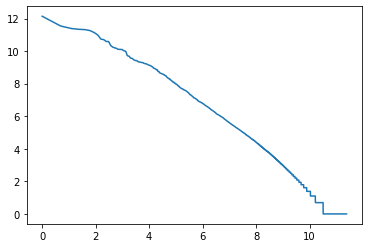

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(16, 9))
plt.figure()
plt.plot(x_axis,frequency)
plt.show()

[[15.03429631]
 [14.08808487]
 [13.53458667]
 ...
 [-0.50247332]
 [-0.50248889]
 [-0.50250446]]


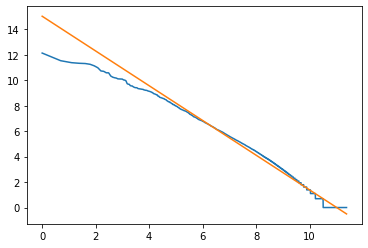

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_axis.reshape(-1,1), frequency.reshape(-1,1))
pred_list = []
y_axis = reg.predict(x_axis.reshape(-1,1))
print(y_axis)
#plt.figure(figsize=(16, 9))
plt.figure()
plt.plot(x_axis,frequency)
plt.plot(x_axis,y_axis)
plt.show()

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
lower_case = reviewText[1].lower()
tokens = nltk.word_tokenize(lower_case)
print(lower_case)
print(nltk.pos_tag(tokens))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
i highly recommend this series. it is a must for anyone who is yearning to watch "grown up" television. complex characters and plots to keep one totally involved. thank you amazin prime.
[('i', 'NN'), ('highly', 'RB'), ('recommend', 'VB'), ('this', 'DT'), ('series', 'NN'), ('.', '.'), ('it', 'PRP'), ('is', 'VBZ'), ('a', 'DT'), ('must', 'MD'), ('for', 'IN'), ('anyone', 'NN'), ('who', 'WP'), ('is', 'VBZ'), ('yearning', 'VBG'), ('to', 'TO'), ('watch', 'VB'), ('``', '``'), ('grown', 'VBN'), ('up', 'RP'), ("''", "''"), ('television', 'NN'), ('.', '.'), ('complex', 'JJ'), ('characters', 'NNS'), ('and', 'CC'), ('plots', 'NNS'), ('to', 'TO'), ('keep', 'VB'), ('one', 'CD'), ('totally', 'RB'), ('involv